# Data Mining on Indeed job postings

### Initalize libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="darkgrid")
%matplotlib inline

#### Load mastered data from .csv

In [143]:
data_scientist_trends = pd.read_csv('./Scraped Data/Data Scientist 2020-05-31.csv', encoding='UTF-8')

#### Drop Full Description for now. We will focus on it in another notebook.

In [144]:
data_scientist_trends = data_scientist_trends.drop(columns=['Full_Description'])

#### Explore Dataset

In [145]:
data_scientist_trends.head()

,Primary_Key,Title,Company,Location,Salary,Ratings,Remote_work,Date_posted
0,94f3279c66a2af26,Principal PK/PD Statistical Programmer,Prescribe Data,"Toronto, ON",None,None,Remote work available,Just posted
1,7292631b85b6c5f3,Senior Data Scientist,Tonal,"Toronto, ON",None,None,None,1 day ago
2,9dc10ad7bd2ba391,Applied Scientist,Cyclica,"Toronto, ON",None,None,None,2 days ago
3,7c88fbde01e34960,Product Manager â€“ Enterprise Data and Analytics,Real Matters,"Toronto, ON",None,2,Remote work available,2 days ago
4,d4953b2cd0f46973,"Senior Data Analyst, Investigations",Investment Industry Reg Org of Canada,"Toronto, ON",None,None,None,2 days ago


In [6]:
data_scientist_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 8 columns):
Primary_Key    2676 non-null object
Title          2676 non-null object
Company        2676 non-null object
Location       2676 non-null object
Salary         2676 non-null object
Ratings        2676 non-null object
Remote_work    2676 non-null object
Date_posted    2676 non-null object
dtypes: object(8)
memory usage: 167.4+ KB


In [7]:
data_scientist_trends.describe(include='all')

,Primary_Key,Title,Company,Location,Salary,Ratings,Remote_work,Date_posted
count,2676,2676,2676,2676,2676,2676,2676,2676
unique,2676,1764,1289,423,118,31,2,31
top,e3fc45727a075e0f,Data Scientist,Amazon.com Services LLC,"Seattle, WA",None,None,None,30+ days ago
freq,1,269,200,277,2542,751,2496,1791


In [8]:
data_scientist_trends.dtypes

Primary_Key    object
Title          object
Company        object
Location       object
Salary         object
Ratings        object
Remote_work    object
Date_posted    object
dtype: object

## Explore Ratings

In [8]:
ratings_df = data_scientist_trends[['Ratings']] 

In [9]:
ratings_df.head()

,Ratings
0,None
1,None
2,None
3,2
4,None


In [10]:
Ratings_count = ratings_df.Ratings.value_counts()
print(Ratings_count[Ratings_count>1])

None    751
3.6     361
4       237
3.8     213
4.2     204
3.9     164
4.1     135
3.7      95
4.3      79
3.5      77
3.4      67
3.3      42
4.4      33
4.5      27
3.2      24
5        24
3        23
4.8      18
2.8      17
2.7      17
3.1      15
4.7      13
4.6      10
2.9      10
2         6
2.2       5
2.6       4
2.5       2
Name: Ratings, dtype: int64


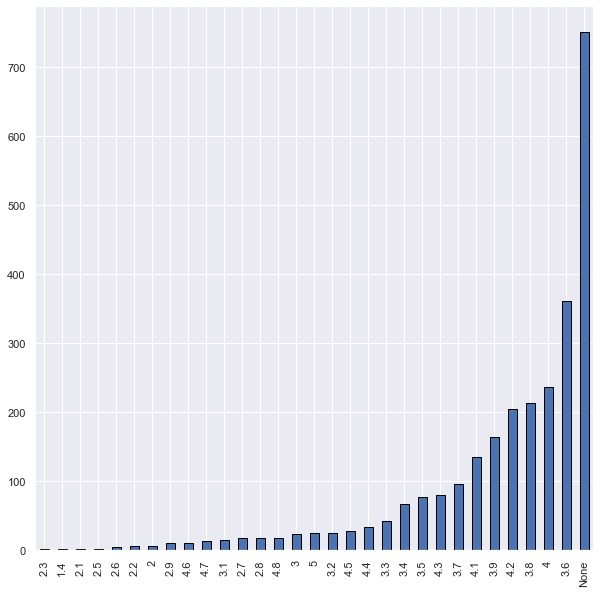

In [11]:
plt.rcParams['figure.figsize'] = [10, 10]
ratings_df.Ratings.value_counts().sort_values().plot(kind = 'bar',edgecolor='black',
                                                     linewidth='1', grid=True, x = 'Count', y = 'Ratings')

In [12]:
Ratings_count.describe(include='all')

count     31.000000
mean      86.322581
std      151.010460
min        1.000000
25%       10.000000
50%       24.000000
75%       87.000000
max      751.000000
Name: Ratings, dtype: float64

#### Drop <i> 'None' </i>

In [13]:
ratings_df = ratings_df[ratings_df.Ratings != 'None']

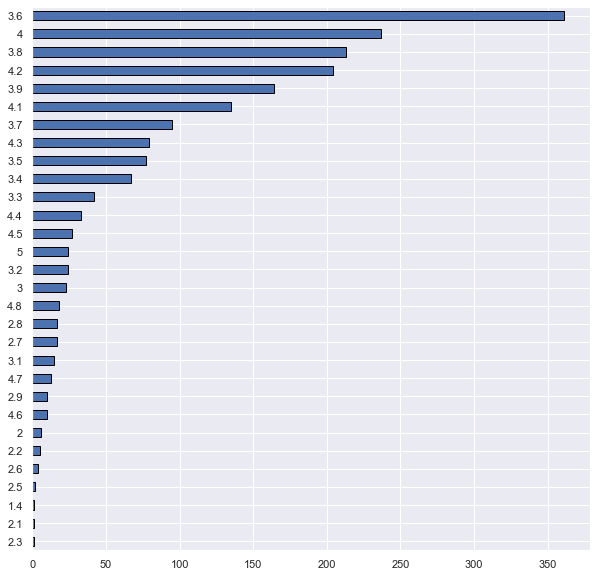

In [14]:
plt.rcParams['figure.figsize'] = [10, 10]
ratings_df.Ratings.value_counts().sort_values().plot(kind = 'barh',edgecolor='black',
                                                     linewidth='1', grid=True, x = 'Count', y = 'Ratings')

#### Categorize rating with 0.5 diffenrence.
<i>Example: 0 - 0.5 - 1.0 - 1.5 - 2.0 .... 4.5 - 5.0

In [15]:
ratings_df['Ratings'].dtypes

dtype('O')

In [16]:
# Change column type to float
ratings_df['Ratings'] = ratings_df['Ratings'].astype(float)
ratings_df['Ratings'].dtypes

dtype('float64')

In [17]:
# Create a new column with mod of 0.5
ratings_df['Mod'] = ratings_df.Ratings % 0.5

In [18]:
ratings_df.Mod.dtypes

dtype('float64')

In [19]:
ratings_df.head()

,Ratings,Mod
3,2.0,0.0
5,2.2,0.2
8,3.9,0.4
9,3.9,0.4
10,3.9,0.4


for some reason the <b>Mod column is acting strange.</b> i.e. showing multiple values of 0.1 and 0.4

In [20]:
ratings_df.Mod.unique()

array([0. , 0.2, 0.4, 0.3, 0.1, 0.1, 0.4])

created a <b>work around</b> this discrepancy. That <b>only fits this particular solution</b>

In [21]:
ratings_df['Mod'] = np.where(ratings_df.Mod < 0.3, ratings_df.Mod * -1 , ratings_df.Mod)

In [22]:
ratings_df.Mod.unique()

array([-0. , -0.2,  0.4, -0.3, -0.1, -0.1,  0.4])

In [23]:
ratings_df['Mod'] = np.where(ratings_df.Mod > 0.3, 0.1 , ratings_df.Mod)

In [24]:
ratings_df.Mod.unique()

array([-0. , -0.2,  0.1, -0.3, -0.1, -0.1])

In [25]:
ratings_df['Mod'] = np.where(ratings_df.Mod < -0.25, 0.2 , ratings_df.Mod)

In [26]:
ratings_df.Mod.unique()

array([-0. , -0.2,  0.1,  0.2, -0.1, -0.1])

In [27]:
ratings_df.head()

,Ratings,Mod
3,2.0,-0.0
5,2.2,-0.2
8,3.9,0.1
9,3.9,0.1
10,3.9,0.1


#### New column with categorised values

In [28]:
ratings_df['New'] = ratings_df['Ratings'] + ratings_df['Mod']

In [29]:
ratings_df

,Ratings,Mod,New
3,2.0,-0.0,2.0
5,2.2,-0.2,2.0
8,3.9,0.1,4.0
9,3.9,0.1,4.0
10,3.9,0.1,4.0
...,...,...,...
2670,3.7,-0.2,3.5
2671,4.2,-0.2,4.0
2672,4.0,-0.0,4.0
2674,4.2,-0.2,4.0


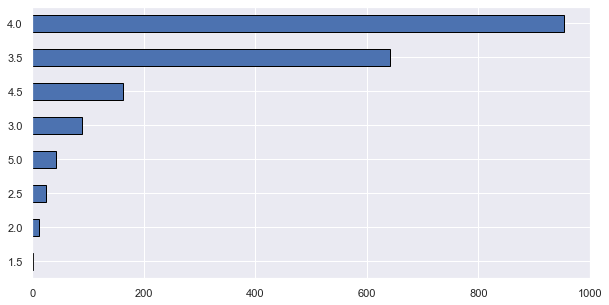

In [30]:
plt.rcParams['figure.figsize'] = [10, 5]
ratings_df.New.value_counts().sort_values().plot(kind = 'barh',edgecolor='black',
                                                     linewidth='1', grid=True, x = 'Count', y = 'Ratings')

## Explore Location

In [31]:
Location_df = data_scientist_trends[['Location']]

In [32]:
Location_df.describe(include='all')

,Location
count,2676
unique,423
top,"Seattle, WA"
freq,277


In my <b>earlier version</b> of data scraping code.I scared all location data <b>with seprator '|'.</b> Now i have to remove the extra info, that is the zip/postal codes mostly. To just <b>get the city and state</b>

In [33]:
Location_df['Location'] = Location_df['Location'].str.split('|').str[0]
Location_df['Location'] = Location_df['Location'].str.strip()

C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
Location_df.Location.describe()

count            2676
unique            338
top       Seattle, WA
freq              278
Name: Location, dtype: object

In [35]:
Location_df.Location.head()

0    Toronto, ON
1    Toronto, ON
2    Toronto, ON
3    Toronto, ON
4    Toronto, ON
Name: Location, dtype: object

In [36]:
Location_count = Location_df.Location.value_counts()
print(Location_count[Location_count>10])

Seattle, WA                      278
New York, NY                     214
San Francisco, CA                186
Washington, DC                    97
Toronto, ON                       91
Montréal, QC                      72
Austin, TX                        65
Los Angeles, CA                   50
McLean, VA                        43
San Francisco, CA 94103           43
Redmond, WA                       42
Vancouver, BC                     39
Arlington, VA                     31
McLean, VA 22102                  30
Herndon, VA                       28
San Francisco, CA 94105           28
Washington, DC 20006              27
New York, NY 10011                23
Gaithersburg, MD 20878            22
Arlington, VA 22202               21
Redwood City, CA                  21
Springfield, VA                   21
San Mateo, CA                     20
New York, NY 10017                19
Ottawa, ON                        19
San Francisco, CA 94104           18
Alexandria, VA                    18
S

#### Seprate City and State into different columns

In [37]:
Location_df['City'] = Location_df['Location'].str.split(',').str[0]
Location_df['State'] = Location_df['Location'].str.split(',').str[1:]
Location_df['State'] = [' '.join(map(str, l)) for l in Location_df['State']]
Location_df['State'] = Location_df['State'].str.strip()
Location_df['State'] = Location_df['State'].str.split(' ').str[0]

C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [38]:
Location_df['State'].describe()

count     2676
unique      12
top         CA
freq       670
Name: State, dtype: object

In [39]:
Location_df['City'].describe()

count         2676
unique         130
top       New York
freq           389
Name: City, dtype: object

In [40]:
State_count = Location_df.State.value_counts()
print(State_count[State_count>10])

CA    670
WA    437
NY    417
VA    393
MD    184
DC    173
ON    133
TX    111
QC     83
BC     41
OR     19
AB     15
Name: State, dtype: int64


#### Number of Data Scientist jobs in each state and city

#### State

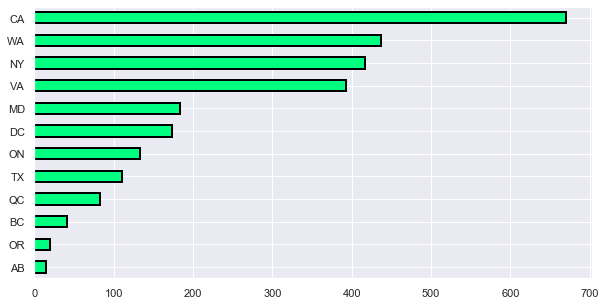

In [41]:
Location_df.State.value_counts().sort_values().plot(kind = 'barh',edgecolor='black',
                                                     linewidth='2', grid=True,colormap ='winter_r')

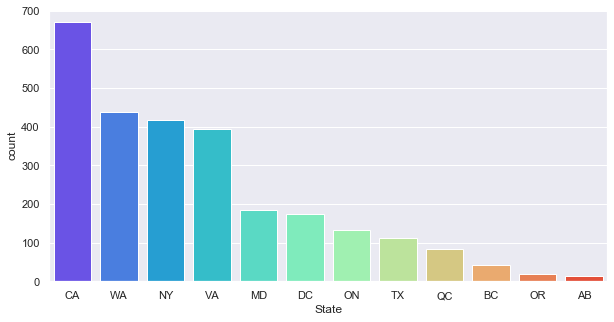

In [42]:
sns.countplot(x='State',data=Location_df,palette='rainbow', 
              order = Location_df.State.value_counts().index)

#### City

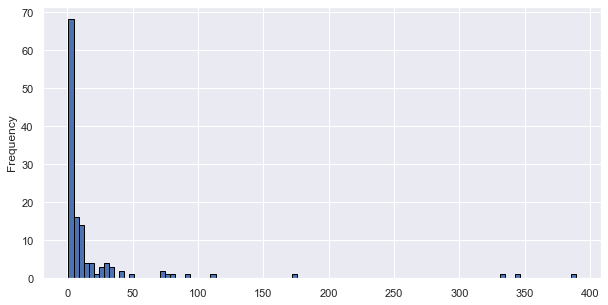

In [43]:
Location_df.City.value_counts().plot(bins=100,kind = 'hist',edgecolor='black',
                                                     linewidth='1', grid=True, x = 'Count', y = 'Ratings')

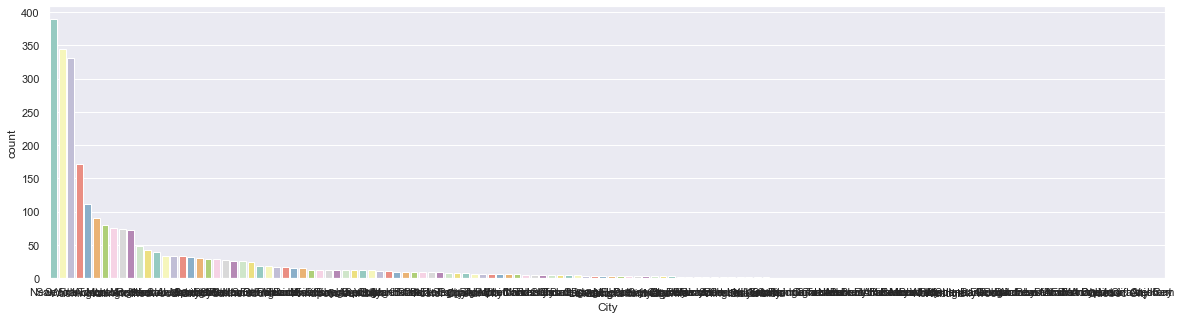

In [44]:
plt.rcParams['figure.figsize'] = [20, 5]
sns.countplot(x='City',data=Location_df,palette='Set3', 
              order = Location_df.City.value_counts().index)

In [45]:
City_count = Location_df.City.value_counts()
New = City_count[City_count>30]

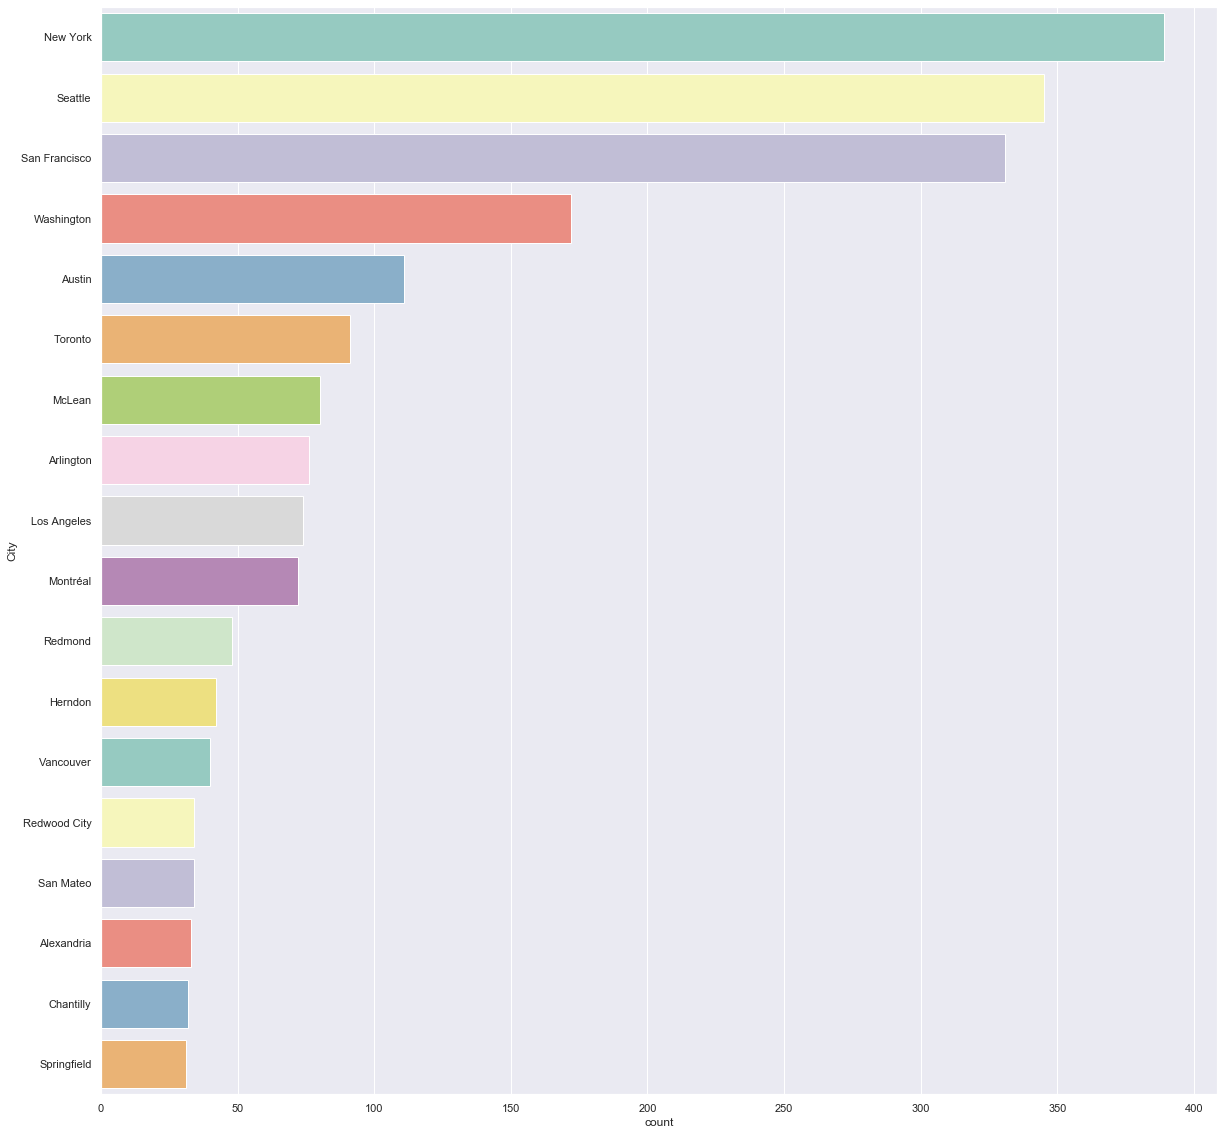

In [46]:
plt.rcParams['figure.figsize'] = [20, 20]
sns.countplot(y='City',data=Location_df,palette='Set3', 
              order = New.index)

## Explore Title

In [9]:
title_df = data_scientist_trends[['Title']] 

In [10]:
title_df.describe()

,Title
count,2676
unique,1764
top,Data Scientist
freq,269


In [11]:
title_df.head()

,Title
0,Principal PK/PD Statistical Programmer
1,Senior Data Scientist
2,Applied Scientist
3,Product Manager – Enterprise Data and Analytics
4,"Senior Data Analyst, Investigations"


<b>Example:</b> Does not contain "Data"

In [12]:
title_df[~title_df.Title.str.contains("Data")]

,Title
0,Principal PK/PD Statistical Programmer
2,Applied Scientist
6,Machine Learning Engineer
7,Senior Back End Developer/Machine Learning Eng...
10,"Manager, Pricing, Analytics and Reporting"
...,...
2667,"Applied Scientist, Alexa Speech"
2668,"Sr. Manager, Selling Partner Analytics"
2670,Software Engineer: Machine Learning / Signal P...
2671,Apple Media Products Engineering - Machine Lea...


### Data Scientist Title

In [13]:
# title_df = title_df[title_df.Title.str.contains("Scientist")|title_df.Title.str.contains("Data")]
data_scientist_title = title_df[title_df.Title.str.contains("Data Scientist")]

In [14]:
data_scientist_title.describe()

,Title
count,950
unique,460
top,Data Scientist
freq,269


In [15]:
data_scientist_title['Title'] = data_scientist_title['Title'].map(lambda x: re.sub(r'[^a-zA-Z0-9]+', ' ', x))

C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
#Fix this error/warning
data_scientist_title['Title'] = data_scientist_title['Title'].str.split(' ')

C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
data_scientist_title['Lenght'] = data_scientist_title['Title'].apply(len)

C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
data_scientist_title.head()

,Title,Lenght
1,"[Senior, Data, Scientist]",3
11,"[Senior, Data, Scientist]",3
13,"[Data, Scientist, III]",3
14,"[Data, Scientist]",2
15,"[Data, Scientist]",2


In [19]:
# expand list column into multiple columns
data_scientist_title['Title'].apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,Senior,Data,Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Senior,Data,Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Data,Scientist,III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Data,Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Data,Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,Principal,Data,Scientist,Prime,Video,Personalization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2664,Program,Manager,Data,Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2666,Data,Scientist,Delphi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2672,Principal,Data,Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove Data Scientist
    """
    # Check characters to see if they are in punctuation
    name_list = ['Data','Scientist']
    return [char for char in mess if char not in name_list]

In [21]:
data_scientist_title['Other'] = data_scientist_title['Title'].apply(text_process)

C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data_scientist_title['Other'].describe()

count     950
unique    428
top        []
freq      269
Name: Other, dtype: object

In [23]:
def text_process_B(mess):
    """
    Takes in a string of text, then performs the following:
    1. Keep Data Scientist
    """
    # Check characters to see if they are in punctuation
    name_list = ['Data','Scientist']
    nopunc = [char for char in mess if char in name_list]

    nopunc = ' '.join(nopunc)
    
    return nopunc.strip()

In [24]:
data_scientist_title['Title'] = data_scientist_title['Title'].apply(text_process_B)

C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
data_scientist_title.head(10)

,Title,Lenght,Other
1,Data Scientist,3,[Senior]
11,Data Scientist,3,[Senior]
13,Data Scientist,3,[III]
14,Data Scientist,2,[]
15,Data Scientist,2,[]
16,Data Scientist,3,[Principal]
26,Data Scientist,6,"[Fall, 2020, Student, Opportunities]"
28,Data Scientist,2,[]
30,Data Scientist,6,"[Senior, Toronto, Intact, Lab]"
31,Data Scientist,3,[Senior]


In [26]:
data_scientist_title.describe(include='all')

,Title,Lenght,Other
count,950,950.000000,950
unique,9,NaN,428
top,Data Scientist,NaN,[]
freq,911,NaN,269
mean,NaN,3.828421,NaN
std,NaN,1.989178,NaN
min,NaN,2.000000,NaN
25%,NaN,2.000000,NaN
50%,NaN,3.000000,NaN
75%,NaN,5.000000,NaN


In [27]:
data_scientist_title.Title.unique()

array(['Data Scientist', 'Data Data', 'Data Scientist Data',
       'Data Scientist Data Scientist', 'Data Scientist Data Data',
       'Data Data Scientist', 'Data', 'Data Scientist Scientist',
       'Scientist Data Scientist'], dtype=object)

In [28]:
data_scientist_title[data_scientist_title.Title == '']

,Title,Lenght,Other


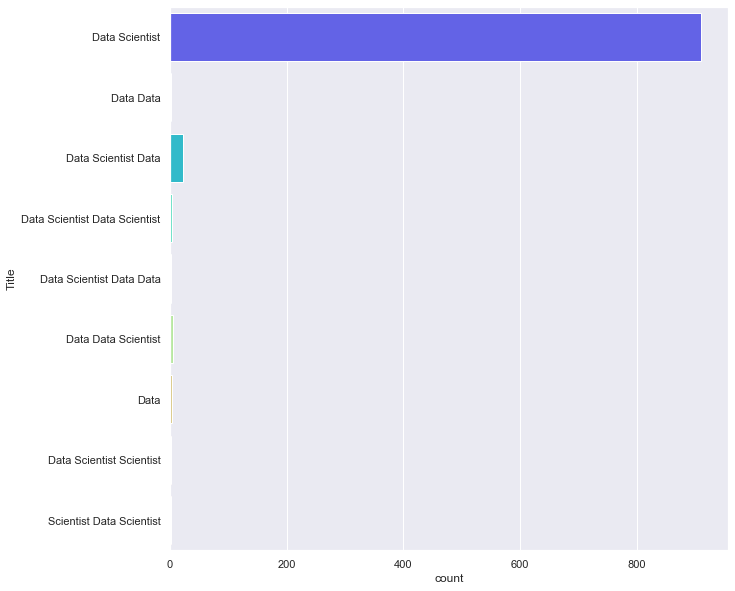

In [29]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.countplot(y='Title',data=data_scientist_title,palette='rainbow')

In [30]:
data_scientist_trends.loc[1031]

Primary_Key                                c81d6ecf0d5e690f
Title          Operations Research Analyst (Data Scientist)
Company                           US Department of the Army
Location                                   Fort Belvoir, VA
Salary                           $121,316 - $157,709 a year
Ratings                                                 4.3
Remote_work                           Remote work available
Date_posted                                      3 days ago
Name: 1031, dtype: object

In [31]:
other_words = data_scientist_title['Other']
list_of_other_words = other_words.to_list()

In [32]:
print(list_of_other_words)

[['Senior'], ['Senior'], ['III'], [], [], ['Principal'], ['Fall', '2020', 'Student', 'Opportunities'], [], ['Senior', 'Toronto', 'Intact', 'Lab'], ['Senior'], [], [], [], [], [], [], [], [], [], [], ['Sr'], ['Engineer'], ['Team', 'Lead'], ['Sr'], [], [], ['Senior'], ['Time', 'Series'], [], [], ['Intact', 'Lab'], [], ['Lead'], ['Senior'], [], ['Actuarial', 'Analyst', 'all', 'levels', 'Scientists', 'all', 'levels', 'Support', 'to', 'Hong', 'Kong', 'Lab'], ['Scientifique', 'des', 'donn', 'es', '4', 'mois', '4', 'months', ''], ['Scientifique', 'des', 'donn', 'es', '4', 'mois', '4', 'months', ''], ['Senior', 'Scientifique', 'des', 'donn', 'es', 'principal'], [], ['Lead', 'Scientifique', 'des', 'donn', 'es', 'en', 'chef'], [], ['Scientifique', 'de', 'Donn', 'es'], [], ['Senior', 'NLP'], [], ['Marketing', 'm', 'f', 'd', ''], ['Intern'], [], ['Senior', 'NLP'], [''], ['Scientifique', 'des', 'donn', 'es'], [], [], [], ['Senior', 'AI', 'Unity'], ['Sr'], ['Analyst'], [], ['Senior'], ['Lead'], [], 

In [33]:
flat_list = [item for sublist in list_of_other_words for item in sublist]

In [34]:
print(flat_list)

['Senior', 'Senior', 'III', 'Principal', 'Fall', '2020', 'Student', 'Opportunities', 'Senior', 'Toronto', 'Intact', 'Lab', 'Senior', 'Sr', 'Engineer', 'Team', 'Lead', 'Sr', 'Senior', 'Time', 'Series', 'Intact', 'Lab', 'Lead', 'Senior', 'Actuarial', 'Analyst', 'all', 'levels', 'Scientists', 'all', 'levels', 'Support', 'to', 'Hong', 'Kong', 'Lab', 'Scientifique', 'des', 'donn', 'es', '4', 'mois', '4', 'months', '', 'Scientifique', 'des', 'donn', 'es', '4', 'mois', '4', 'months', '', 'Senior', 'Scientifique', 'des', 'donn', 'es', 'principal', 'Lead', 'Scientifique', 'des', 'donn', 'es', 'en', 'chef', 'Scientifique', 'de', 'Donn', 'es', 'Senior', 'NLP', 'Marketing', 'm', 'f', 'd', '', 'Intern', 'Senior', 'NLP', '', 'Scientifique', 'des', 'donn', 'es', 'Senior', 'AI', 'Unity', 'Sr', 'Analyst', 'Senior', 'Lead', 'Spatial', 'R', 'D', 'Batteries', '', 'Junior', 'Environmental', 'Senior', 'Quebec', 'City', 'Intact', 'Lab', 'Sponsored', 'Brands', 'Recommendations', 'Lead', 'Senior', 'Customer', 

In [35]:
other_words_df = pd.DataFrame(flat_list, columns = ['Title_Words'])

In [41]:
Title_Words_count = other_words_df.Title_Words.value_counts()
Title_Words_count = Title_Words_count[Title_Words_count>10]

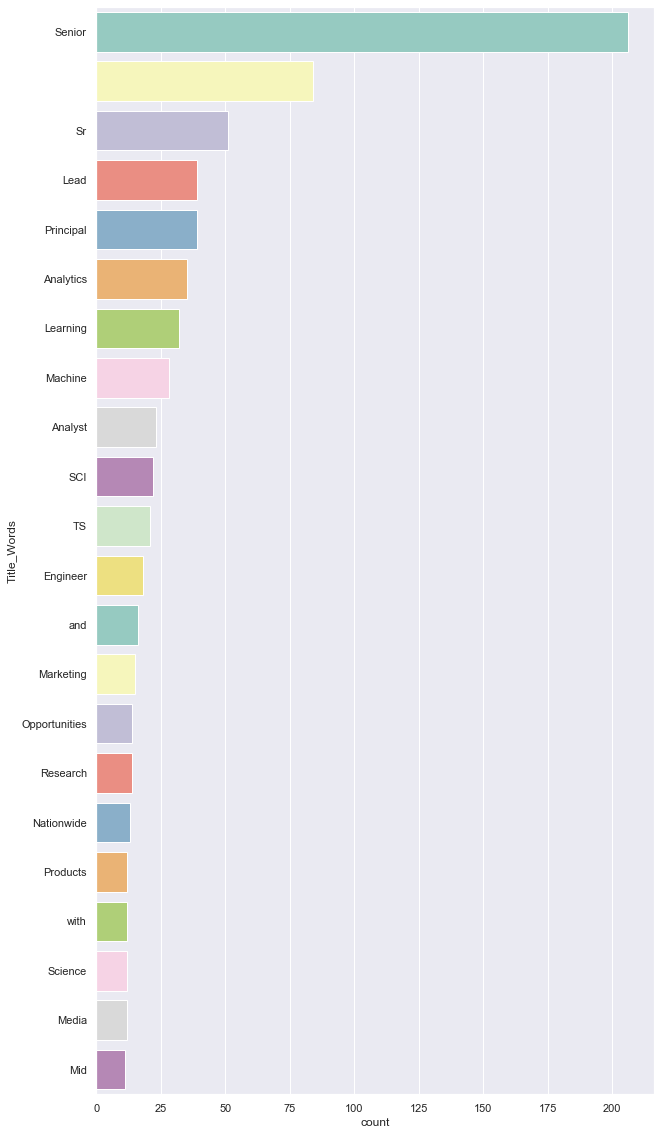

In [44]:
plt.rcParams['figure.figsize'] = [10, 20]
sns.countplot(y='Title_Words',data=other_words_df,palette='Set3', 
              order = Title_Words_count.index)

## Explore Remote_work

In [45]:
remote_df = data_scientist_trends[['Remote_work']] 

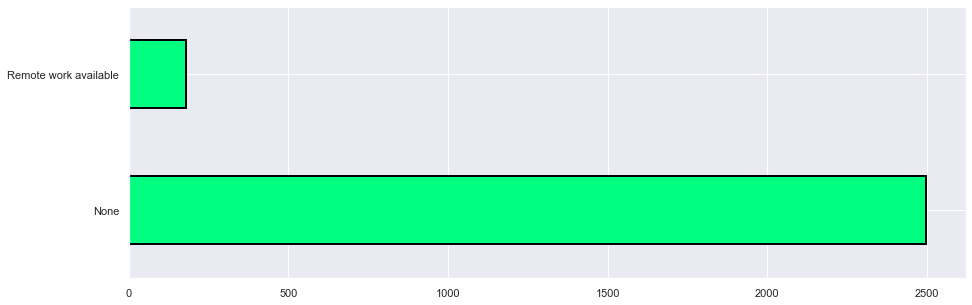

In [54]:
plt.rcParams['figure.figsize'] = [15, 5]
remote_df.Remote_work.value_counts().plot(kind = 'barh',edgecolor='black',
                                                     linewidth='2', grid=True,colormap ='winter_r')

## Explore Salary

In [169]:
salary_df = data_scientist_trends[['Salary']]  

In [170]:
salary_df.describe()

,Salary
count,2676
unique,118
top,None
freq,2542


In [171]:
salary_df = salary_df[salary_df.Salary != 'None']

In [172]:
salary_df.describe()

,Salary
count,134
unique,117
top,"$70,000 - $95,000 a year"
freq,3


In [173]:
salary_df.head(5)

,Salary
20,$43.55 - $50.46 an hour
27,"$45,000 a year"
44,"$55,000 - $70,000 a year"
117,"$60,000 - $120,000 a year"
124,$45 - $50 an hour


In [174]:
salary_df['Salary_list'] = salary_df['Salary'].str.split(' ')
salary_df['Per'] = salary_df['Salary'].str.split(' ').str[-1]

In [175]:
salary_df.head(5)

,Salary,Salary_list,Per
20,$43.55 - $50.46 an hour,"[$43.55, -, $50.46, an, hour]",hour
27,"$45,000 a year","[$45,000, a, year]",year
44,"$55,000 - $70,000 a year","[$55,000, -, $70,000, a, year]",year
117,"$60,000 - $120,000 a year","[$60,000, -, $120,000, a, year]",year
124,$45 - $50 an hour,"[$45, -, $50, an, hour]",hour


In [202]:
salary_df.loc[:, 'Lower'] = salary_df.Salary_list.map(lambda x: x[0])
salary_df['Lower'] = salary_df['Lower'].map(lambda x: re.sub(r'[^0-9a-zA-Z.]', '', x))

In [203]:
salary_df.head(5)

,Salary,Salary_list,Per,Lower,Upper
20,$43.55 - $50.46 an hour,"[$43.55, -, $50.46, an, hour]",hour,43.55,"[5, 0, ., 4, 6]"
27,"$45,000 a year","[$45,000, a, year]",year,45000,NaN
44,"$55,000 - $70,000 a year","[$55,000, -, $70,000, a, year]",year,55000,"[7, 0, ,, 0, 0, 0]"
117,"$60,000 - $120,000 a year","[$60,000, -, $120,000, a, year]",year,60000,"[1, 2, 0, ,, 0, 0, 0]"
124,$45 - $50 an hour,"[$45, -, $50, an, hour]",hour,45,"[5, 0]"


In [218]:
salary_df['Upper'] = salary_df['Salary'].str.split('-').str[1]
salary_df['Upper'] = salary_df['Upper'].str.split(' ').str[1]

In [220]:
salary_df['Upper'] = salary_df['Upper'].str.split('').str[2:-1]
# write a number processor function

AttributeError: Can only use .str accessor with string values!

In [216]:
salary_df['Upper'] 

'20            [5, 0, ., 4, 6]\n27                        NaN\n44         [7, 0, ,, 0, 0, 0]\n117     [1, 2, 0, ,, 0, 0, 0]\n124                    [5, 0]\n182     [1, 5, 0, ,, 0, 0, 0]\n201     [1, 2, 0, ,, 0, 0, 0]\n209     [1, 1, 0, ,, 0, 0, 0]\n231     [2, 2, 3, ,, 5, 0, 0]\n237                       NaN\n241                       NaN\n245     [1, 2, 0, ,, 8, 5, 2]\n263        [7, 7, ,, 7, 8, 3]\n264     [1, 0, 8, ,, 8, 2, 0]\n273                    [1, 8]\n283     [1, 0, 0, ,, 0, 0, 0]\n313     [1, 9, 0, ,, 0, 0, 0]\n314     [1, 9, 0, ,, 0, 0, 0]\n352        [9, 5, ,, 0, 0, 0]\n365     [2, 1, 0, ,, 0, 0, 0]\n368        [7, 5, ,, 0, 0, 0]\n373        [9, 5, ,, 0, 0, 0]\n379     [1, 0, 0, ,, 0, 0, 0]\n381        [8, 5, ,, 0, 0, 0]\n395        [8, 0, ,, 0, 0, 0]\n404     [1, 1, 1, ,, 0, 0, 3]\n412        [8, 5, ,, 0, 0, 0]\n436        [9, 7, ,, 3, 5, 8]\n457     [1, 0, 0, ,, 0, 0, 0]\n485     [1, 5, 0, ,, 0, 0, 0]\n546     [1, 6, 0, ,, 0, 0, 0]\n557                       NaN\n607    

In [180]:
salary_df.to_csv('file_name1.csv', mode='a', index=False)

In [ ]:
[^0-9,] 